In [1]:
# ------ River imports ---------

from river import stream

# Metrics
from river.metrics import Accuracy, Precision, Recall, F1, CohenKappa, BalancedAccuracy

# Drift Detectors
from river.drift import ADWIN, KSWIN, PageHinkley, DriftRetrainingClassifier
from river.drift.binary import *

# Classifiers
from river.linear_model import LogisticRegression
from river.forest import ARFClassifier
from river.tree import HoeffdingTreeClassifier, ExtremelyFastDecisionTreeClassifier

In [2]:
# ------ Sk-learn imports -------------

# sklearn classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Sklearn Metric
from sklearn.metrics import cohen_kappa_score, accuracy_score, f1_score

# Others
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# ------ Basic python lib imports ----------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3
import mplcursors
from collections import deque
import warnings
from scipy.stats import ks_2samp

warnings.filterwarnings("ignore")

# %matplotlib inline
# mpld3.enable_notebook()

In [4]:
# ------ Get "LEARNING Strategy" data --------------------------
df_experiment = pd.read_csv(
    "C:/Users/HP/Desktop/github-aditya0by0/stream-viz/data/experiment.csv",
    header=[0, 1, 2],
    index_col=[0, 1],
)
df_experiment.head()

model_all                                       model_optimal  \
batch     summary confusion_matrix                            summary   
start       kappa           (A, A) (A, B) (B, A) (B, B)         kappa   
0   49                                                                  
50  99   0.593128               29      4      5     12      0.593128   
100 149  0.447950               22      2     12     14      0.409449   
150 199  0.838710               26      0      4     20      0.919614   
200 249  0.880000               23      2      1     24      0.840000   
250 299  0.918831               27      1      1     21      0.959612   

                                               ... model_smraed_prioc  \
batch   confusion_matrix                       ...            summary   
start             (A, A) (A, B) (B, A) (B, B)  ...              kappa   
0   49                                         ...                      
50  99                29      4      5     12  ...           0.432892   
100 149               22      2     13     13  ...           0.221184   
150 199               26      0      2     22  ...           0.592834   
200 249               22      3      1     24  ...           0.680000   
250 299               27      1      0     22  ...           0.672131   

                                              model_smraed_                   \
batch   confusion_matrix                            summary confusion_matrix   
start             (A, A) (A, B) (B, A) (B, B)         kappa           (A, A)   
0   49                                                                         
50  99                29      4      8      9      0.593128               29   
100 149               23      1     19      7      0.334898               23   
150 199               26      0     10     14      0.426230               26   
200 249               22      3      5     20      0.520000               25   
250 299               25      3      5     17      0.573379               28   

                              
batch                         
start   (A, B) (B, A) (B, B)  
0   49                        
50  99       4      5     12  
100 149      1     16     10  
150 199      0     14     10  
200 249      0     12     13  
250 299      0     10     12  

[5 rows x 45 columns]

In [5]:
df_experiment.index.get_level_values(0)

Index([   50,   100,   150,   200,   250,   300,   350,   400,   450,   500,
       ...
       12500, 12550, 12600, 12650, 12700, 12750, 12800, 12850, 12900, 12950],
      dtype='int64', name='0', length=259)

In [6]:
# len(df_experiment.columns)
df_experiment.columns.get_level_values(0).unique()

Index(['model_all', 'model_optimal', 'model_label', 'model_feat', 'model_nafa',
       'model_smraed_catc', 'model_smraed_sumc', 'model_smraed_prioc',
       'model_smraed_'],
      dtype='object')

In [7]:
unique_columns = df_experiment.columns.get_level_values(0).unique()
kappa_df = pd.DataFrame(columns=unique_columns)
for learning_strategy in unique_columns:
    kappa_df[learning_strategy] = df_experiment[learning_strategy]["summary"]["kappa"]
kappa_df["Batch_Start"] = kappa_df.index.get_level_values(0)
kappa_df = kappa_df.set_index("Batch_Start")
kappa_df.head()

,model_all,model_optimal,model_label,model_feat,model_nafa,model_smraed_catc,model_smraed_sumc,model_smraed_prioc,model_smraed_
Batch_Start,,,,,,,,,
50,0.593128,0.593128,0.432892,0.593128,0.432892,0.257426,0.257426,0.432892,0.593128
100,0.447950,0.409449,0.294671,0.332810,0.296875,0.334898,0.296875,0.221184,0.334898
150,0.838710,0.919614,0.388254,0.676375,0.384236,0.592834,0.634146,0.592834,0.426230
200,0.880000,0.840000,0.720000,0.760000,0.360000,0.680000,0.680000,0.680000,0.520000
250,0.918831,0.959612,0.720000,0.708819,0.295775,0.672131,0.708819,0.672131,0.573379


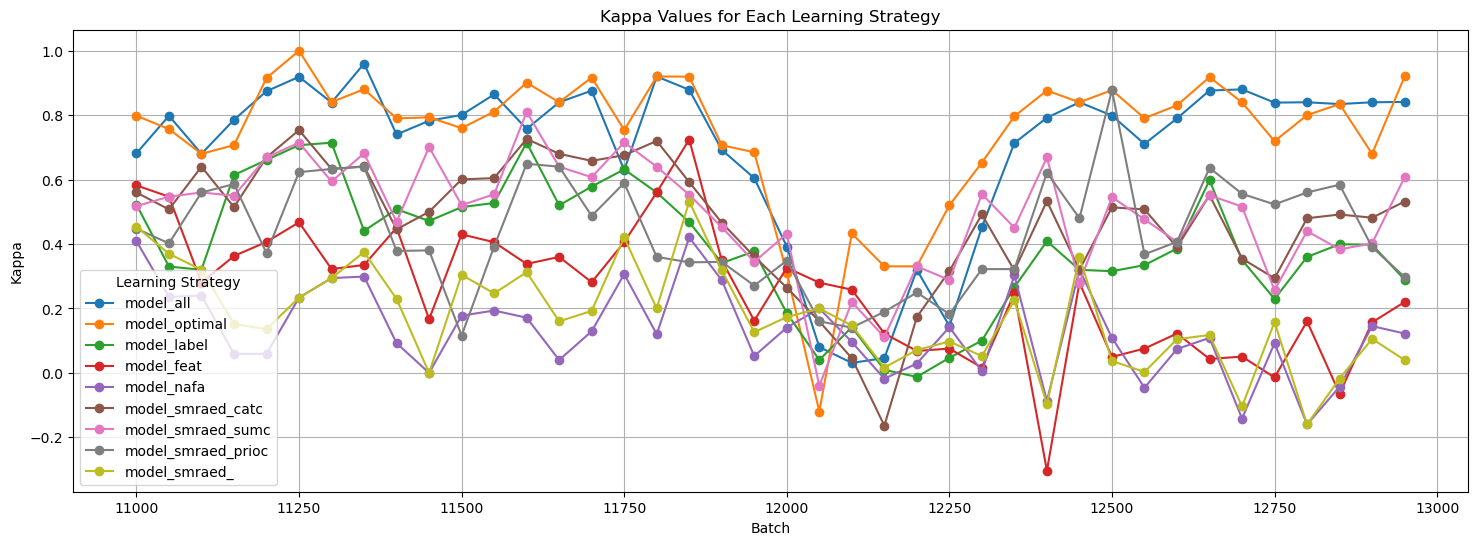

In [36]:
def plot_learning_stratergy(start=50, end=100):
    # Plot the kappa values
    plt.figure(figsize=(18, 6))

    kappa_window_df = kappa_df.loc[start:end]
    for strategy in unique_columns:
        plt.plot(
            kappa_window_df.index, kappa_window_df[strategy], marker="o", label=strategy
        )

    # Add labels and title
    plt.xlabel("Batch")
    plt.ylabel("Kappa")
    plt.title("Kappa Values for Each Learning Strategy")
    plt.legend(title="Learning Strategy")
    plt.grid(True)
    # Show the plot
    plt.show()


# plot_learning_stratergy(0, 10)
plot_learning_stratergy(start=11000, end=13000)

In [9]:
kappa_df.head()

,model_all,model_optimal,model_label,model_feat,model_nafa,model_smraed_catc,model_smraed_sumc,model_smraed_prioc,model_smraed_
Batch_Start,,,,,,,,,
50,0.593128,0.593128,0.432892,0.593128,0.432892,0.257426,0.257426,0.432892,0.593128
100,0.447950,0.409449,0.294671,0.332810,0.296875,0.334898,0.296875,0.221184,0.334898
150,0.838710,0.919614,0.388254,0.676375,0.384236,0.592834,0.634146,0.592834,0.426230
200,0.880000,0.840000,0.720000,0.760000,0.360000,0.680000,0.680000,0.680000,0.520000
250,0.918831,0.959612,0.720000,0.708819,0.295775,0.672131,0.708819,0.672131,0.573379


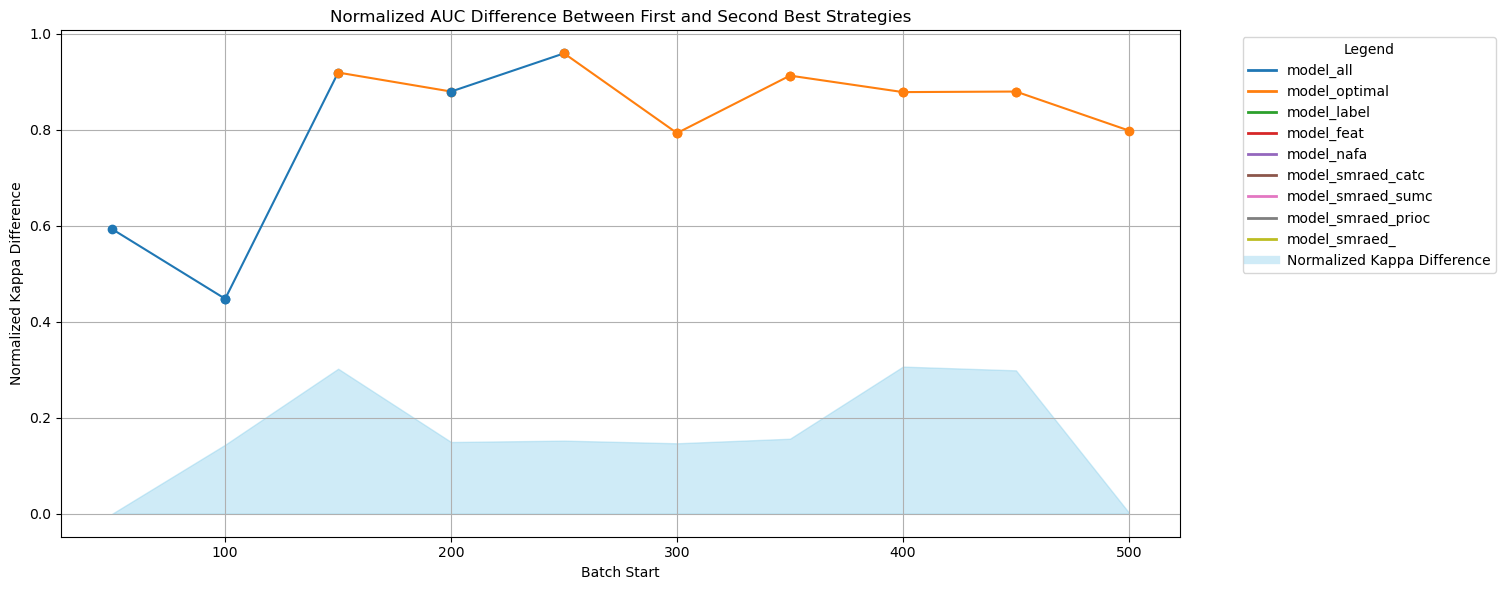

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming kappa_df and unique_columns are defined elsewhere
# kappa_df is a DataFrame with kappa values, unique_columns is a list of strategy names


def plot_learning_strategy_winner(start=0, end=10):
    # Determine the strategy with the highest kappa at each batch
    max_strategy = kappa_df.idxmax(axis=1)
    kappa_window_df = kappa_df.copy(deep=True)
    kappa_window_df["Max_Kappa"] = kappa_df.max(axis=1)
    kappa_window_df["Max_Strategy"] = max_strategy

    # Define colors for each strategy
    color_dict = {
        strategy: plt.cm.tab10(i) for i, strategy in enumerate(unique_columns)
    }

    # Plot the line with colors based on the strategy with the highest kappa
    plt.figure(figsize=(18, 6))
    kappa_window_df = kappa_window_df.iloc[start:end]
    for i in range(len(kappa_window_df) - 1):
        x = [kappa_window_df.index[i], kappa_window_df.index[i + 1]]
        y = [
            kappa_window_df["Max_Kappa"].iloc[i],
            kappa_window_df["Max_Kappa"].iloc[i + 1],
        ]
        plt.plot(
            x, y, color=color_dict[kappa_window_df["Max_Strategy"].iloc[i]], marker="o"
        )

    # Add labels and title
    plt.xlabel("Batch Start")
    plt.ylabel("Kappa")
    plt.title("Kappa Values with Color Indicating Strategy with Highest Score")

    # Create legend handles for the strategies
    legend_handles = [
        plt.Line2D([0], [0], color=color_dict[strategy], lw=2, label=strategy)
        for strategy in unique_columns
    ]

    sorted_kappa = kappa_df.apply(lambda x: np.sort(x)[::-1], axis=1)
    first_best_kappa = sorted_kappa.apply(lambda x: x[0])
    second_best_kappa = sorted_kappa.apply(lambda x: x[1])

    # Calculate the difference between the highest and second-highest kappa values
    kappa_diff = first_best_kappa - second_best_kappa

    # Normalize the differences using the known kappa range (-1 to 1)
    # normalized_diff = (kappa_diff + 1) / 2

    # The range is scaled to [-1, 1] which ensures a kappa difference of 0 maps to 0 normalized value.
    # normalized_diff = kappa_diff / 2

    # This approach ensures the normalization is based on the observed data range,
    # making the normalized values fit within the context of the observed kappa differences.
    # diff_range = kappa_diff.max() - kappa_diff.min()
    # normalized_diff = kappa_diff / diff_range if diff_range != 0 else kappa_diff

    # Scale the kappa differences to a range of [0, 1], with a check to avoid division by zero.
    diff_range = kappa_diff.max() - kappa_diff.min()
    normalized_diff = (
        (kappa_diff - kappa_diff.min()) / diff_range if diff_range != 0 else kappa_diff
    )

    # Plot the area plot for the AUC difference
    plt.fill_between(
        kappa_diff.index[start:end],
        normalized_diff[start:end],
        color="skyblue",
        alpha=0.4,
        label="Normalized Kappa Difference",
    )

    # Add labels and title
    plt.xlabel("Batch Start")
    plt.ylabel("Normalized Kappa Difference")
    plt.title("Normalized AUC Difference Between First and Second Best Strategies")
    plt.grid(True)

    # Add the AUC difference to the legend handles
    legend_handles.append(
        plt.Line2D(
            [0],
            [0],
            color="skyblue",
            lw=6,
            alpha=0.4,
            label="Normalized Kappa Difference",
        )
    )

    # Create a single legend outside the plot
    plt.legend(
        handles=legend_handles,
        title="Legend",
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
    )

    # Adjust layout to make space for the legends
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    # Show the plot
    plt.show()


# Example call to the function
plot_learning_strategy_winner(start=0, end=10)

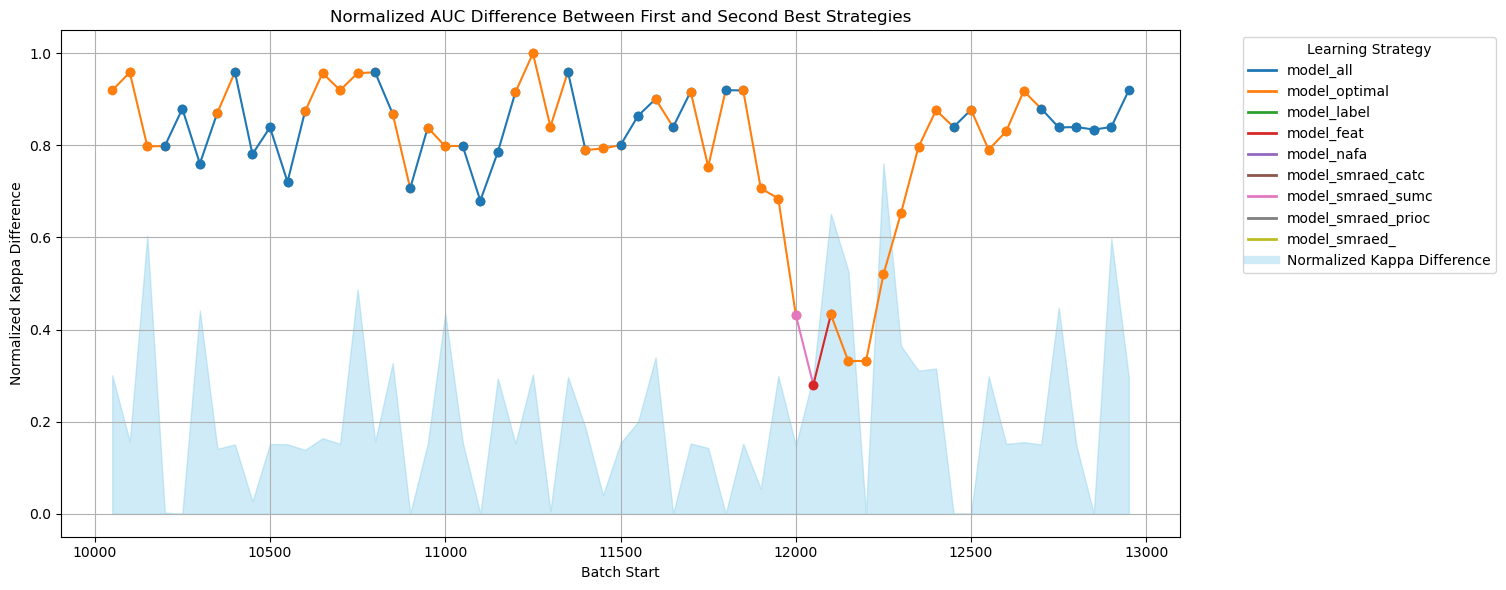

In [28]:
def plot_learning_strategy_winner(start=0, end=10):
    # Determine the strategy with the highest kappa at each batch
    max_strategy = kappa_df.idxmax(axis=1)
    kappa_window_df = kappa_df.copy(deep=True)
    kappa_window_df["Max_Kappa"] = kappa_df.max(axis=1)
    kappa_window_df["Max_Strategy"] = max_strategy

    # Define colors for each strategy
    color_dict = {
        strategy: plt.cm.tab10(i) for i, strategy in enumerate(unique_columns)
    }

    # Plot the line with colors based on the strategy with the highest kappa
    plt.figure(figsize=(18, 6))
    kappa_window_df = kappa_window_df.iloc[start:end]
    for i in range(len(kappa_window_df) - 1):
        x = [kappa_window_df.index[i], kappa_window_df.index[i + 1]]
        y = [
            kappa_window_df["Max_Kappa"].iloc[i],
            kappa_window_df["Max_Kappa"].iloc[i + 1],
        ]
        plt.plot(
            x, y, color=color_dict[kappa_window_df["Max_Strategy"].iloc[i]], marker="o"
        )

    # Add labels and title
    plt.xlabel("Batch Start")
    plt.ylabel("Kappa")
    plt.title("Kappa Values with Color Indicating Strategy with Highest Score")

    # Create legend handles for the strategies
    legend_handles = [
        plt.Line2D([0], [0], color=color_dict[strategy], lw=2, label=strategy)
        for strategy in unique_columns
    ]

    sorted_kappa = kappa_df.apply(lambda x: np.sort(x)[::-1], axis=1)
    first_best_kappa = sorted_kappa.apply(lambda x: x[0])
    second_best_kappa = sorted_kappa.apply(lambda x: x[1])

    # Calculate the difference between the highest and second-highest kappa values
    kappa_diff = first_best_kappa - second_best_kappa

    # Normalize the differences for plotting
    normalized_diff = (kappa_diff - kappa_diff.min()) / (
        kappa_diff.max() - kappa_diff.min()
    )

    # Plot the area plot for the AUC difference
    plt.fill_between(
        kappa_diff.index[start:end],
        normalized_diff[start:end],
        color="skyblue",
        alpha=0.4,
        label="Normalized Kappa Difference",
    )

    # Add labels and title
    plt.xlabel("Batch Start")
    plt.ylabel("Normalized Kappa Difference")
    plt.title("Normalized AUC Difference Between First and Second Best Strategies")
    plt.grid(True)

    # Add the AUC difference to the legend handles
    legend_handles.append(
        plt.Line2D(
            [0],
            [0],
            color="skyblue",
            lw=6,
            alpha=0.4,
            label="Normalized Kappa Difference",
        )
    )

    # Create a single legend outside the plot
    plt.legend(
        handles=legend_handles,
        title="Learning Strategy",
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
    )

    # Adjust layout to make space for the legends
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    # Show the plot
    plt.show()


# Example call to the function
plot_learning_strategy_winner(start=200, end=12000)

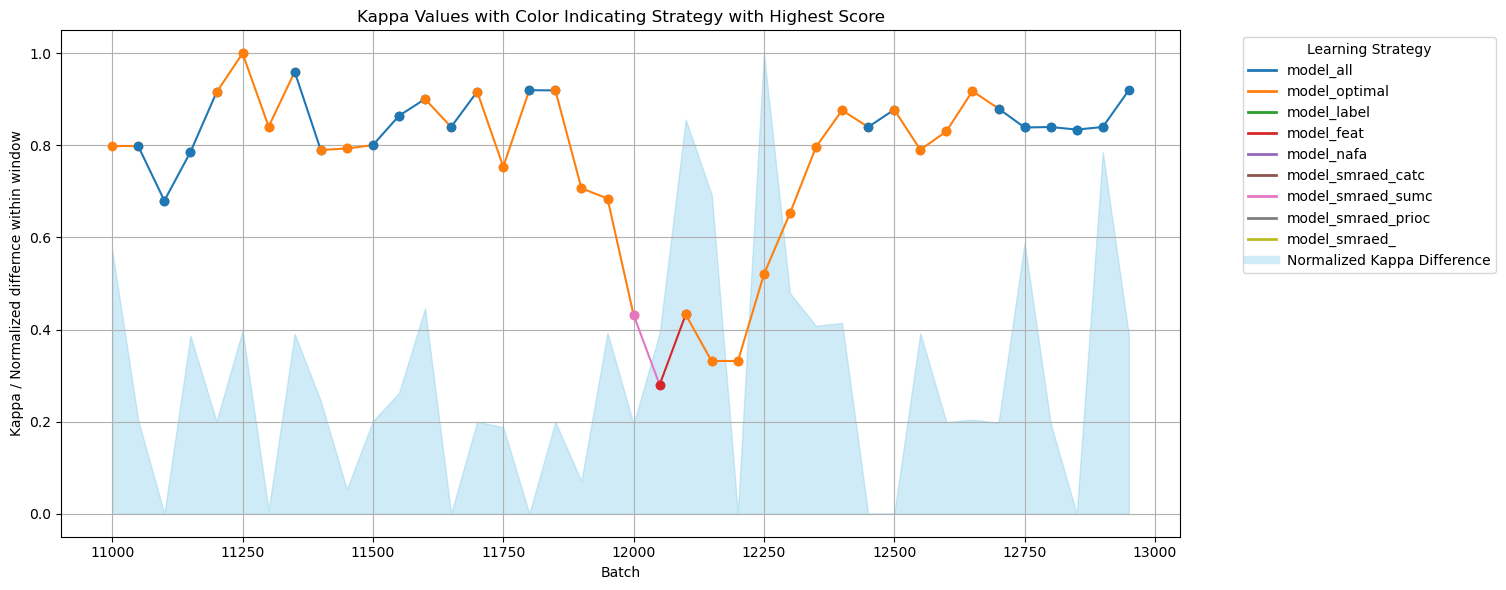

In [42]:
import matplotlib.pyplot as plt
import numpy as np


def plot_learning_strategy_winner(kappa_df, unique_columns, start=0, end=10):
    # Determine the strategy with the highest kappa at each batch
    max_strategy = kappa_df.idxmax(axis=1)
    kappa_window_df = kappa_df.copy(deep=True)
    kappa_window_df["Max_Kappa"] = kappa_df.max(axis=1)
    kappa_window_df["Max_Strategy"] = max_strategy

    # Define colors for each strategy
    color_dict = {
        strategy: plt.cm.tab10(i) for i, strategy in enumerate(unique_columns)
    }

    # Plot the line with colors based on the strategy with the highest kappa
    plt.figure(figsize=(18, 6))
    kappa_window_df = kappa_window_df.loc[start:end]
    for i in range(len(kappa_window_df) - 1):
        x = [kappa_window_df.index[i], kappa_window_df.index[i + 1]]
        y = [
            kappa_window_df["Max_Kappa"].iloc[i],
            kappa_window_df["Max_Kappa"].iloc[i + 1],
        ]
        plt.plot(
            x, y, color=color_dict[kappa_window_df["Max_Strategy"].iloc[i]], marker="o"
        )

    # Add labels and title
    plt.xlabel("Batch")
    plt.ylabel("Kappa / Normalized differnce within window")
    plt.title("Kappa Values with Color Indicating Strategy with Highest Score")

    # Create legend handles for the strategies
    legend_handles = [
        plt.Line2D([0], [0], color=color_dict[strategy], lw=2, label=strategy)
        for strategy in unique_columns
    ]

    # Sort kappa values and calculate the difference between the highest and second-highest kappa values
    sorted_kappa = kappa_window_df[unique_columns].apply(
        lambda x: np.sort(x)[::-1], axis=1
    )
    first_best_kappa = sorted_kappa.apply(lambda x: x[0])
    second_best_kappa = sorted_kappa.apply(lambda x: x[1])

    kappa_diff = first_best_kappa - second_best_kappa

    diff_range = kappa_diff.max() - kappa_diff.min()

    # Normalize the differences using the known kappa range (-1 to 1)
    # normalized_diff = (kappa_diff + 1) / 2

    # The range is scaled to [-1, 1] which ensures a kappa difference of 0 maps to 0 normalized value.
    # normalized_diff = kappa_diff / 2

    # This approach ensures the normalization is based on the observed data range,
    # making the normalized values fit within the context of the observed kappa differences.
    # diff_range = kappa_diff.max() - kappa_diff.min()
    # normalized_diff = kappa_diff / diff_range if diff_range != 0 else kappa_diff

    # Scale the kappa differences to a range of [0, 1], with a check to avoid division by zero.
    normalized_diff = (
        (kappa_diff - kappa_diff.min()) / diff_range if diff_range != 0 else kappa_diff
    )

    # Plot the area plot for the kappa difference
    plt.fill_between(
        kappa_diff.index,
        normalized_diff,
        color="skyblue",
        alpha=0.4,
        label="Normalized Kappa Difference",
    )

    # Add the kappa difference to the legend handles
    legend_handles.append(
        plt.Line2D(
            [0],
            [0],
            color="skyblue",
            lw=6,
            alpha=0.4,
            label="Normalized Kappa Difference",
        )
    )

    # Create a single legend outside the plot
    plt.legend(
        handles=legend_handles,
        title="Learning Strategy",
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
    )

    # Adjust layout to make space for the legends
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.grid(True)
    # Show the plot
    plt.show()


# Example call to the function
plot_learning_strategy_winner(kappa_df, unique_columns, start=11000, end=13000)